<a href="https://colab.research.google.com/github/Pratikpatil19/yolo-model-testing_01/blob/main/4_v9_small_200_32_0_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INITIAL RUN

In [ ]:
!nvidia-smi

Sat Nov 23 10:01:03 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   29C    P0              47W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Combinations/1

/content/drive/MyDrive/Combinations/1


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/Combinations/1


# No run

In [ ]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Total 325 (delta 0), reused 0 (delta 0), pack-reused 325 (from 1)
Receiving objects: 100% (325/325), 2.25 MiB | 5.25 MiB/s, done.
Resolving deltas: 100% (162/162), done.
/content/drive/MyDrive/test_train.py/test1/yolov9
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.5 MB/s eta 0:00:00


In [ ]:
!pip install -q roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00


In [ ]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

# **Testing model is working or not**

In [ ]:
!wget -P {HOME}/data -q https://media.roboflow.com/notebooks/examples/dog.jpeg
SOURCE_IMAGE_PATH = f"{HOME}/dog.jpeg"

In [ ]:
!python detect.py --weights {HOME}/weights/gelan-c.pt --conf 0.1 --source {HOME}/data/dog.jpeg --device 0

python3: can't open file '/content/detect.py': [Errno 2] No such file or directory


In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/detect/exp/dog.jpeg", width=600)

FileNotFoundError: [Errno 2] No such file or directory: '/content/yolov9/runs/detect/exp/dog.jpeg'

# Run again

In [ ]:
%cd {HOME}/yolov9

/content/drive/MyDrive/Combinations/1/yolov9


In [ ]:
!pip install Pillow==9.5.0
!pip install torch --upgrade
!pip install torchvision torchaudio --upgrade

**1.**change val_dual file line no. 189
*/content/drive/MyDrive/test_train.py/test1/yolov9/val_dual.py*
  # Inference
        with dt[1]:
            preds = model(im) if compute_loss else (model(im, augment=augment), None)

        # Loss
        if compute_loss:
            # preds = preds[1]
            # train_out = train_out[1]
            loss += compute_loss(preds, targets)[1]  # box, obj, cls
        else:
            preds = preds[0][1]
**2.**change hyp.scratch-high.yaml
/content/drive/MyDrive/test_train.py/test1/yolov9/data/hyps/hyp.scratch-high.yaml*
 #copy_paste: 0.0  # segment copy-paste (probability)

**3.**change yolov9-e.yaml
/content/drive/MyDrive/test_train.py/test1/yolov9/models/detect/yolov9-e.yaml
#nc= classes in number


In [ ]:
!python train_dual.py \
--batch 32 --epochs 200 --img 512 --device 0 --min-items 0 --close-mosaic 15 \
--data /content/drive/MyDrive/Data_set/small/data_small.yaml \
--weights /content/drive/MyDrive/Combinations/1/weights/yolov9-e.pt \
--cfg /content/drive/MyDrive/Combinations/1/yolov9/models/detect/yolov9-e.yaml \
--hyp /content/drive/MyDrive/Combinations/1/yolov9/data/hyps/02_hyp.scratch-high.yaml


2024-11-23 10:02:03.966881: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-23 10:02:03.983441: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-23 10:02:04.004549: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-23 10:02:04.010880: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-23 10:02:04.026014: I tensorflow/core/platform/cpu_feature_guar

In [ ]:
!ls /content/drive/MyDrive/Combinations/1/yolov9/runs/train/exp

confusion_matrix.png				    P_curve.png       train_batch2.jpg
events.out.tfevents.1732188363.58d608a2ac1a.2217.0  PR_curve.png      val_batch0_labels.jpg
F1_curve.png					    R_curve.png       val_batch0_pred.jpg
hyp.yaml					    results.csv       val_batch1_labels.jpg
labels_correlogram.jpg				    results.png       val_batch1_pred.jpg
labels.jpg					    train_batch0.jpg  weights
opt.yaml					    train_batch1.jpg


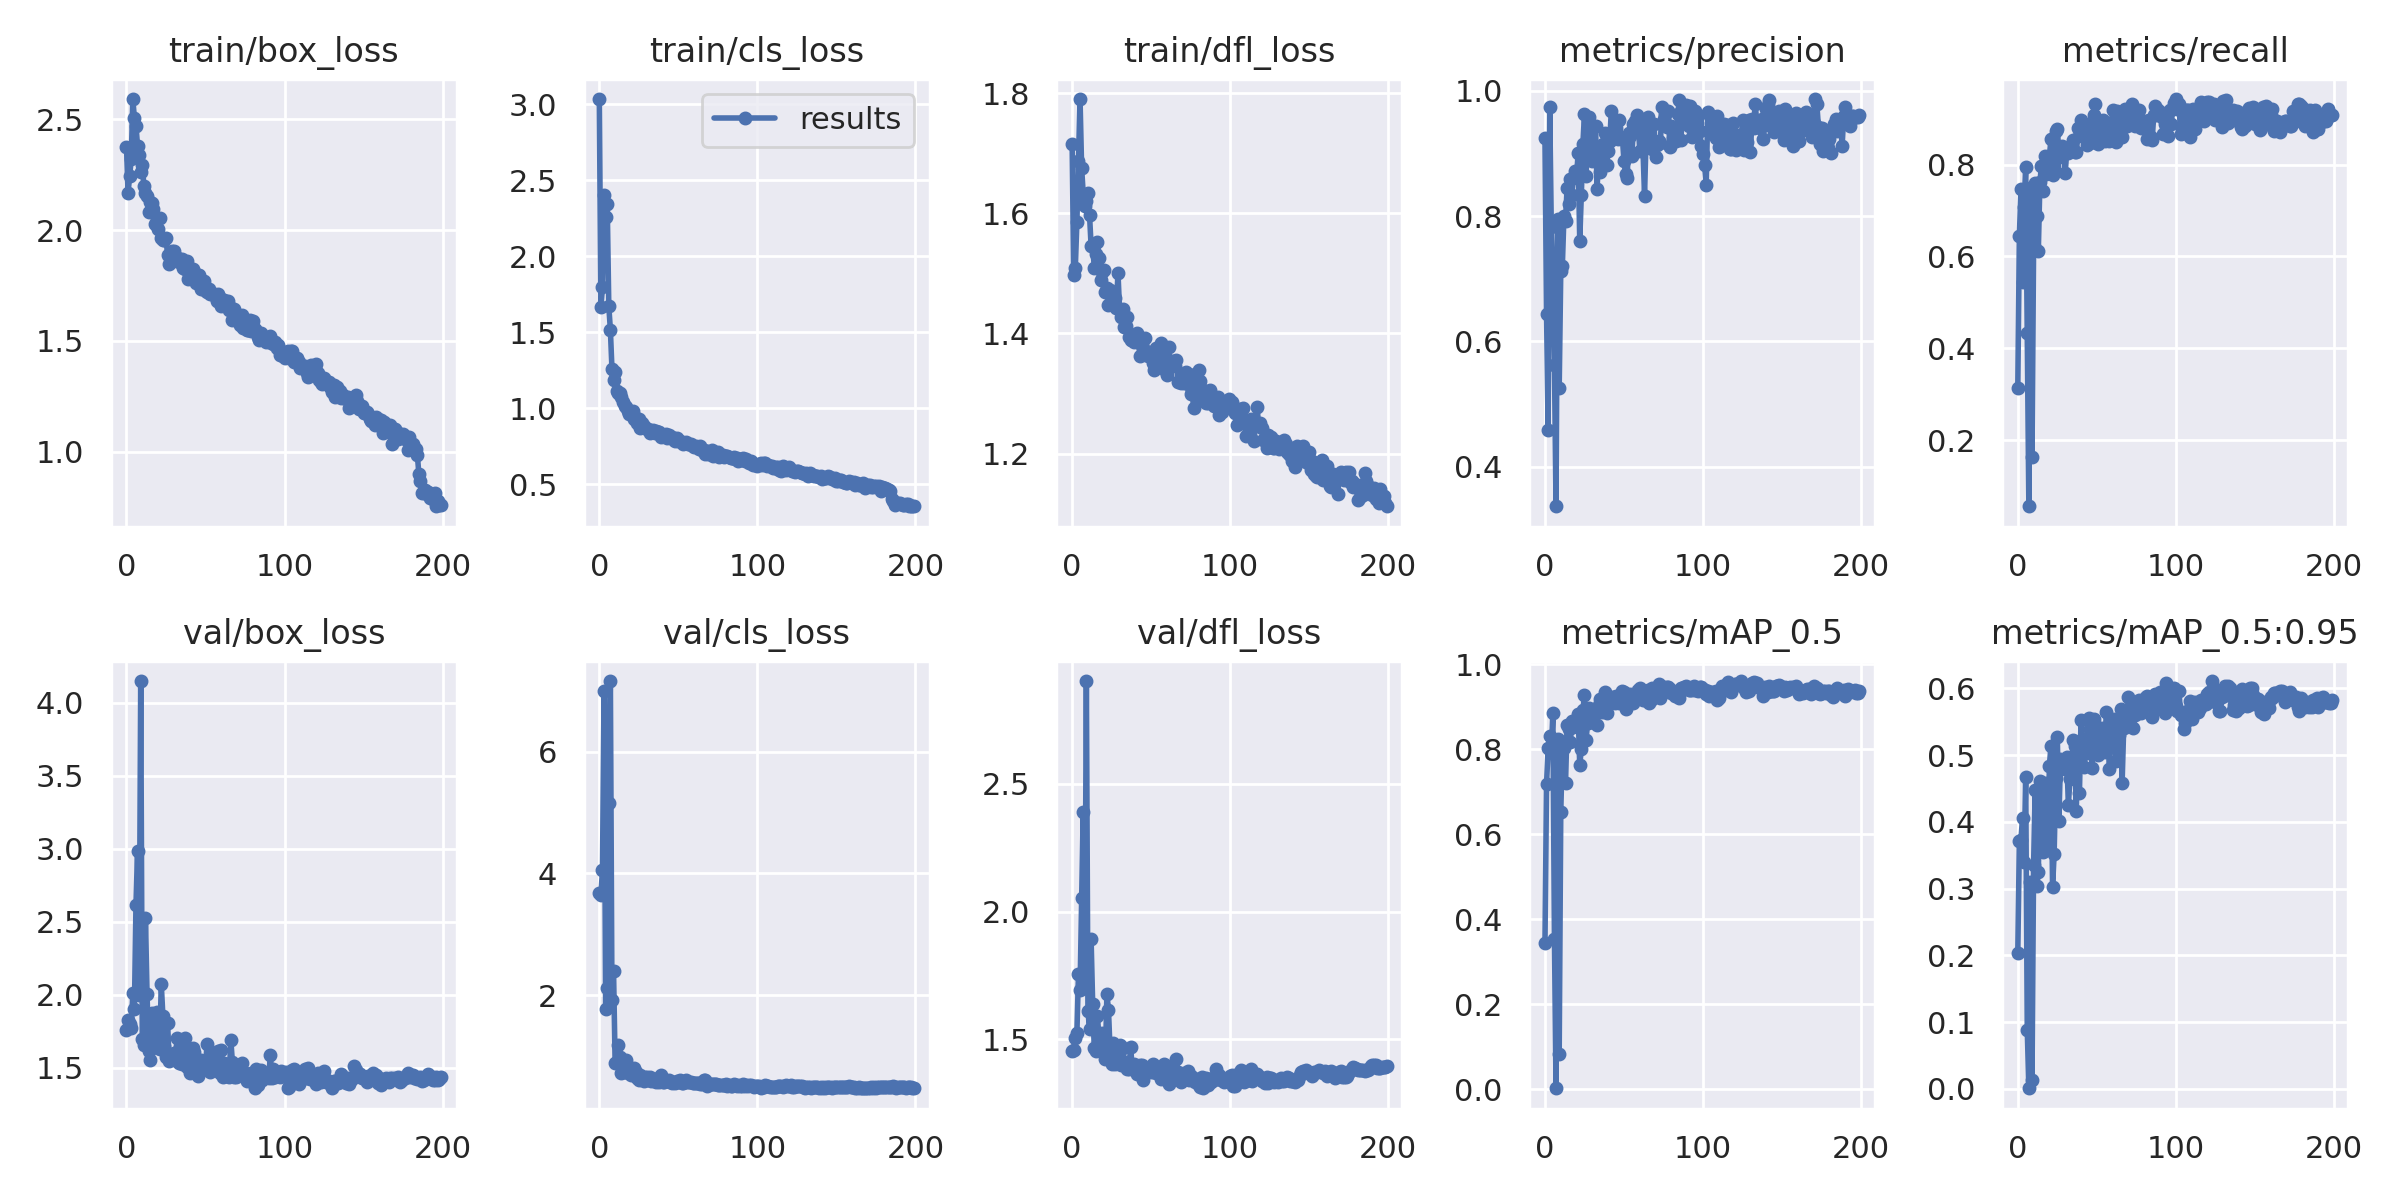

In [ ]:
from IPython.display import Image

Image(filename=f"/content/drive/MyDrive/Combinations/1/yolov9/runs/train/exp/results.png", width=1000)

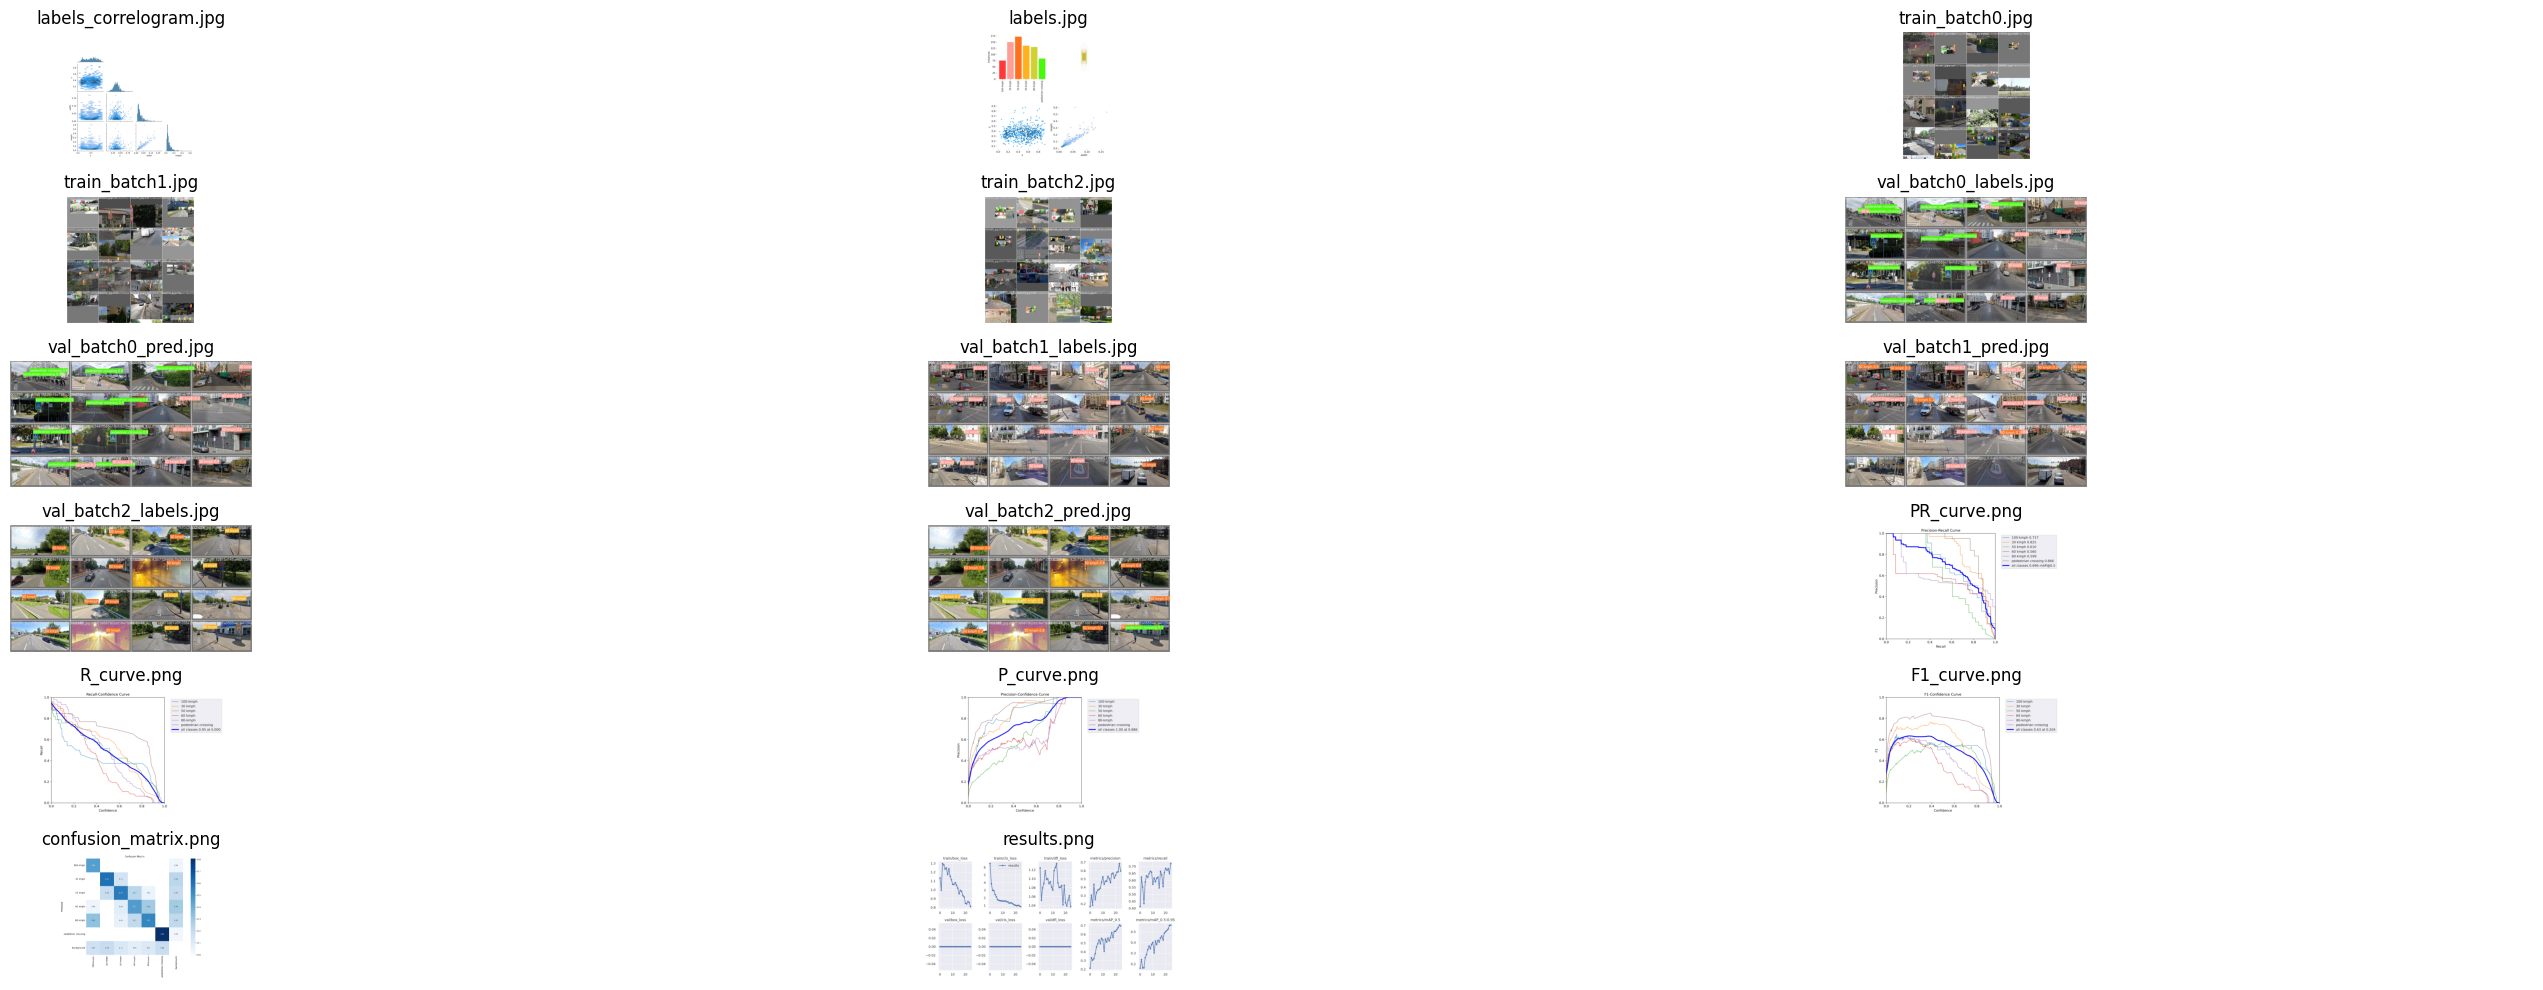

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the directory where your files are located
directory = '/content/drive/MyDrive/test_train.py/test1/yolov9/runs/train/exp8/'

# Get a list of all jpg and png files in the directory
image_files = [f for f in os.listdir(directory) if f.endswith(('.jpg', '.png'))]

# Set up the plot with larger size for images (double the original size)
fig, axes = plt.subplots(nrows=len(image_files) // 3 + 1, ncols=3, figsize=(30, 10))  # Increased figsize
axes = axes.flatten()

# Display each image
for i, image_file in enumerate(image_files):
    img_path = os.path.join(directory, image_file)
    img = mpimg.imread(img_path)
    axes[i].imshow(img)
    axes[i].axis('off')  # Turn off axis for better viewing
    axes[i].set_title(image_file)

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()
